<a href="https://colab.research.google.com/github/mdeniz1/datascienceprojects/blob/main/Market_Basket_Analysis_Generating_Product_Recommendations_using_Apriori_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook presents a system that utilizes the Apriori algorithm, an association rule mining algorithm, to analyze users' historical shopping data and generate new market baskets for providing product recommendations.

The [dataset](https://www.kaggle.com/datasets/aslanahmedov/market-basket-analysis) used consists of 520,000 entries, which can be found here. It encompasses product names from diverse purchases made by different users.

Through the application of the Apriori algorithm, the system identifies frequently co-purchased sets of products. These derived rules serve as the basis for generating product recommendations.






In [ ]:
!pip install mlxtend

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
pd.set_option('display.max_colwidth', None)

In [ ]:
path = r'/content/drive/My Drive/Assignment-1_Data.csv'
df = pd.read_csv(path, sep=';', low_memory=False)
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
df = df[~df['BillNo'].str.contains('^[A-Za-z]')]


In [ ]:
df = df[~(df['Itemname'] == 'DOTCOM POSTAGE')].reset_index(drop=True) #


In [ ]:
df.describe()

,Quantity,CustomerID
count,521353.000000,388007.000000
mean,10.102832,15316.982057
std,161.219996,1721.864615
min,-9600.000000,12346.000000
25%,1.000000,13950.000000
50%,3.000000,15265.000000
75%,10.000000,16837.000000
max,80995.000000,18287.000000


In [ ]:
df=df[df['Quantity']>=0].reset_index()

below, I remove outliars using whisker's formula.

In [ ]:

Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

df = df[(df['Quantity'] >= lower_bound) & (df['Quantity'] <= upper_bound)]
df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465618 entries, 0 to 520016
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   index       465618 non-null  int64  
 1   BillNo      465618 non-null  object 
 2   Itemname    465188 non-null  object 
 3   Quantity    465618 non-null  int64  
 4   Date        465618 non-null  object 
 5   Price       465618 non-null  object 
 6   CustomerID  335674 non-null  float64
 7   Country     465618 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 32.0+ MB


In [ ]:
df['BillNo'] = df['BillNo'].astype(int)

In [ ]:
df=df.dropna(subset=['Itemname']).copy()
df.reset_index(drop=True, inplace=True)


In [ ]:
df['Itemname'] = df['Itemname'].str.strip()


Given that we do not require data such as prices or country-related information within the scope of the problem, I am simplifying the dataset. Although it would be possible to conduct a study based on countries, I have chosen to develop a recommendation system that encompasses all countries.

In [ ]:
df=df[['BillNo', 'Itemname', 'Quantity']]

In [ ]:
df['Itemname'].nunique()

3966

In [ ]:
df.describe()

,BillNo,Quantity
count,465188.000000,465188.000000
mean,559951.801530,4.668050
std,13527.089925,4.424019
min,536365.000000,1.000000
25%,547795.000000,1.000000
50%,560551.000000,3.000000
75%,572065.000000,6.000000
max,581587.000000,23.000000


In [ ]:
data_apriori = df.groupby(["BillNo", "Itemname"])[["Quantity"]].sum(
).unstack().reset_index().fillna(0).set_index("BillNo")

In [ ]:
data_apriori

Quantity                                                 \
Itemname *Boombox Ipod Classic *USB Office Mirror Ball 10 COLOUR SPACEBOY PEN   
BillNo                                                                          
536365                     0.0                     0.0                    0.0   
536366                     0.0                     0.0                    0.0   
536367                     0.0                     0.0                    0.0   
536368                     0.0                     0.0                    0.0   
536369                     0.0                     0.0                    0.0   
...                        ...                     ...                    ...   
581581                     0.0                     0.0                    0.0   
581582                     0.0                     0.0                    0.0   
581585                     0.0                     0.0                    0.0   
581586                     0.0                     0.0                    0.0   
581587                     0.0                     0.0                    0.0   

                                                               \
Itemname 12 COLOURED PARTY BALLOONS 12 DAISY PEGS IN WOOD BOX   
BillNo                                                          
536365                          0.0                       0.0   
536366                          0.0                       0.0   
536367                          0.0                       0.0   
536368                          0.0                       0.0   
536369                          0.0                       0.0   
...                             ...                       ...   
581581                          0.0                       0.0   
581582                          0.0                       0.0   
581585                          0.0                       0.0   
581586                          0.0                       0.0   
581587                          0.0                       0.0   

                                                                 \
Itemname 12 EGG HOUSE PAINTED WOOD 12 HANGING EGGS HAND PAINTED   
BillNo                                                            
536365                         0.0                          0.0   
536366                         0.0                          0.0   
536367                         0.0                          0.0   
536368                         0.0                          0.0   
536369                         0.0                          0.0   
...                            ...                          ...   
581581                         0.0                          0.0   
581582                         0.0                          0.0   
581585                         0.0                          0.0   
581586                         0.0                          0.0   
581587                         0.0                          0.0   

                                                                           \
Itemname 12 IVORY ROSE PEG PLACE SETTINGS 12 MESSAGE CARDS WITH ENVELOPES   
BillNo                                                                      
536365                                0.0                             0.0   
536366                                0.0                             0.0   
536367                                0.0                             0.0   
536368                                0.0                             0.0   
536369                                0.0                             0.0   
...                                   ...                             ...   
581581                                0.0                             0.0   
581582                                0.0                             0.0   
581585                                0.0                             0.0   
581586                                0.0                             0.0   
581587                              

I am removing any erroneous characters that appear in the columns.

In [ ]:
data_apriori.columns = data_apriori.columns.get_level_values(1)# multiindex olarrak oluştu. ikinci seviyedeki kolonları alıyorum burada
data_apriori.columns = data_apriori.columns.str.replace('\d+ ', '')  # sayısal prefixler siliniyor
data_apriori.columns = data_apriori.columns.str.replace('^\*', '')


<ipython-input-18-a11c02d6da0f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data_apriori.columns = data_apriori.columns.str.replace('\d+ ', '')  # sayısal prefixler siliniyor
<ipython-input-18-a11c02d6da0f>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data_apriori.columns = data_apriori.columns.str.replace('^\*', '')


Since the Apriori algorithm accepts binary input (0 or 1), it is necessary to transform the item columns.





In [ ]:
def num(x):
    if x <= 0:
        return 0
    elif x >=1:
        return 1
data_apriori = data_apriori.applymap(num)

In [ ]:
data_apriori.head()

Itemname,Boombox Ipod Classic,USB Office Mirror Ball,COLOUR SPACEBOY PEN,COLOURED PARTY BALLOONS,DAISY PEGS IN WOOD BOX,EGG HOUSE PAINTED WOOD,HANGING EGGS HAND PAINTED,IVORY ROSE PEG PLACE SETTINGS,MESSAGE CARDS WITH ENVELOPES,PENCIL SMALL TUBE WOODLAND,...,dotcom adjust,dotcomstock,for online retail orders,found,had been put aside,michel oops,returned,taig adjust,test,to push order througha s stock was
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Through a trial and error approach, I have noticed that the last 18 columns contain erroneous entries. Therefore, I have decided to remove them.

In [ ]:
last_18_columns = data_apriori.columns[-18:]
print(last_18_columns)


Index(['add stock to allocate online orders', 'adjustment',
       'allocate stock for dotcom orders ta', 'amazon', 'amazon adjust',
       'amazon sales', 'check', 'dotcom', 'dotcom adjust', 'dotcomstock',
       'for online retail orders', 'found', 'had been put aside',
       'michel oops', 'returned', 'taig adjust', 'test',
       'to push order througha s stock was'],
      dtype='object', name='Itemname')


In [ ]:
data_apriori = data_apriori.iloc[:, :-18]
data_apriori.reset_index()

Itemname,BillNo,Boombox Ipod Classic,USB Office Mirror Ball,COLOUR SPACEBOY PEN,COLOURED PARTY BALLOONS,DAISY PEGS IN WOOD BOX,EGG HOUSE PAINTED WOOD,HANGING EGGS HAND PAINTED,IVORY ROSE PEG PLACE SETTINGS,MESSAGE CARDS WITH ENVELOPES,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
0,536365,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,536366,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,536367,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,536368,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,536369,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18106,581581,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18107,581582,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18108,581585,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
18109,581586,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_apriori.to_pickle('/content/drive/My Drive/data_apriori.pkl')



In [ ]:
data_apriori = pd.read_pickle('/content/drive/My Drive/data_apriori.pkl')

In [ ]:
frequent_itemsets = apriori(data_apriori, min_support = 0.005, use_colnames = True)


In [ ]:
rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.6)


In [ ]:
frequent_itemsets.to_pickle('/content/drive/My Drive/frequent_itemsets.pkl')


In [ ]:
#rules2=pd.read_pickle('/content/drive/My Drive/frequent_itemsets.pkl')

In [ ]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7163 entries, 0 to 7162
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         7163 non-null   object 
 1   consequents         7163 non-null   object 
 2   antecedent support  7163 non-null   float64
 3   consequent support  7163 non-null   float64
 4   support             7163 non-null   float64
 5   confidence          7163 non-null   float64
 6   lift                7163 non-null   float64
 7   leverage            7163 non-null   float64
 8   conviction          7163 non-null   float64
dtypes: float64(7), object(2)
memory usage: 503.8+ KB


In [ ]:
rules_new = rules[['antecedents','consequents','confidence','support']].sort_values(by = "confidence", ascending = False).copy()

In [ ]:
rules_new.head()

,antecedents,consequents,confidence,support
6528,"(HERB MARKER THYME, HERB MARKER MINT, HERB MARKER ROSEMARY, HERB MARKER CHIVES)",(HERB MARKER PARSLEY),0.993631,0.008614
7084,"(HERB MARKER THYME, HERB MARKER CHIVES, HERB MARKER BASIL, HERB MARKER MINT, HERB MARKER ROSEMARY)",(HERB MARKER PARSLEY),0.993103,0.007951
6239,"(REGENCY SUGAR BOWL GREEN, REGENCY TEA PLATE ROSES, REGENCY TEA PLATE PINK)",(REGENCY TEA PLATE GREEN),0.989796,0.005356
4570,"(HERB MARKER MINT, HERB MARKER ROSEMARY, HERB MARKER CHIVES)",(HERB MARKER PARSLEY),0.987805,0.008945
4584,"(HERB MARKER MINT, HERB MARKER THYME, HERB MARKER CHIVES)",(HERB MARKER PARSLEY),0.987654,0.008834


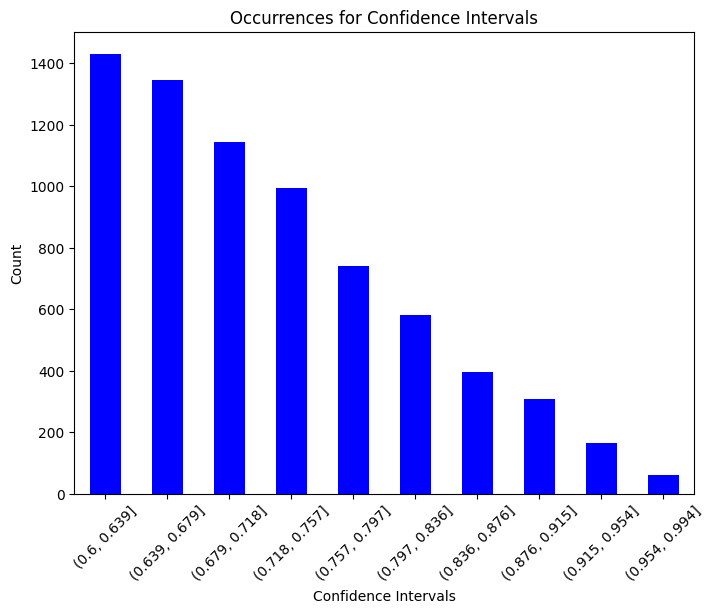

In [ ]:
import matplotlib.pyplot as plt


confidence_intervals = pd.cut(rules_new['confidence'], bins=10)
confidence_counts = confidence_intervals.value_counts().sort_index()

plt.figure(figsize=(8, 6))
confidence_counts.plot(kind='bar', color='blue')
plt.title('Occurrences for Confidence Intervals')
plt.xlabel('Confidence Intervals')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
num=rules_new['antecedents'].nunique()
print(num)

3899


Now that we have the rule set from the dataset, the next step is to build a recommendation system.

In [ ]:
df.head()

,BillNo,Itemname,Quantity
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,WHITE METAL LANTERN,6
2,536365,CREAM CUPID HEARTS COAT HANGER,8
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6


In [ ]:
grouped_df = df.groupby('BillNo')['Itemname'].apply(list).reset_index()
grouped_df.head()

,BillNo,Itemname
0,536365,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE METAL LANTERN, CREAM CUPID HEARTS COAT HANGER, KNITTED UNION FLAG HOT WATER BOTTLE, RED WOOLLY HOTTIE WHITE HEART., SET 7 BABUSHKA NESTING BOXES, GLASS STAR FROSTED T-LIGHT HOLDER]"
1,536366,"[HAND WARMER UNION JACK, HAND WARMER RED POLKA DOT]"
2,536367,"[POPPY'S PLAYHOUSE BEDROOM, POPPY'S PLAYHOUSE KITCHEN, FELTCRAFT PRINCESS CHARLOTTE DOLL, IVORY KNITTED MUG COSY, BOX OF 6 ASSORTED COLOUR TEASPOONS, BOX OF VINTAGE JIGSAW BLOCKS, BOX OF VINTAGE ALPHABET BLOCKS, HOME BUILDING BLOCK WORD, LOVE BUILDING BLOCK WORD, RECIPE BOX WITH METAL HEART, DOORMAT NEW ENGLAND]"
3,536368,"[JAM MAKING SET WITH JARS, RED COAT RACK PARIS FASHION, YELLOW COAT RACK PARIS FASHION, BLUE COAT RACK PARIS FASHION]"
4,536369,[BATH BUILDING BLOCK WORD]


In [ ]:
recommendations = {}

for billno in grouped_df['BillNo']:
    items = grouped_df[grouped_df['BillNo'] == billno]['Itemname'].values[0]
    for index, rule in rules_new.iterrows():
        if all(item in items for item in rules_new['antecedents']):
            consequents = set(rules_new['consequents'])
            recommended_itemset = list(consequents)[0]
            recommendations[billno] = recommended_itemset
            break

df['next_to_buy'] = df['BillNo'].map(recommendations)
